## Installing Necessary Libraries

In [1]:
!python3 -m pip install matplotlib 

In [2]:
!python3 -m pip install seaborn 

In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 5.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 7.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 7.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 7.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 6.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 8.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolc

In [ ]:
import predict
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import seaborn as sns

In [6]:
# Loading the test dataset
df = pd.read_csv('student_data.csv')
df.head()

,Student ID,Gender,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships,Good Candidate
0,0,F,21,Statistics and Machine Learning,2.83,Sorority,4,1,0
1,1,M,20,Information Systems,2.89,Fraternity,5,3,0
2,2,F,20,Math,2.66,Teaching Assistant,3,1,0
3,3,M,20,Information Systems,2.48,Fraternity,5,0,0
4,4,F,21,Statistics and Machine Learning,3.30,Sorority,2,1,0


In [7]:
df.describe()

,Student ID,Age,GPA,Num Programming Languages,Num Past Internships,Good Candidate
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,249.500000,20.944000,2.905780,3.04600,2.052000,0.474000
std,144.481833,1.455025,0.839559,1.36073,1.407572,0.499824
min,0.000000,18.000000,0.000000,1.00000,0.000000,0.000000
25%,124.750000,20.000000,2.345000,2.00000,1.000000,0.000000
50%,249.500000,21.000000,2.990000,3.00000,2.000000,0.000000
75%,374.250000,22.000000,3.560000,4.00000,3.000000,1.000000
max,499.000000,25.000000,4.000000,5.00000,4.000000,1.000000


## Distribution of features in the dataset using visualizations

In [8]:
df.columns

Index(['Student ID', 'Gender', 'Age', 'Major', 'GPA', 'Extra Curricular',
       'Num Programming Languages', 'Num Past Internships', 'Good Candidate'],
      dtype='object')

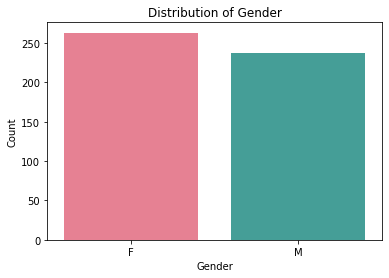

In [9]:
#Gender

custom_palette = sns.color_palette("husl", n_colors=len(df['Gender'].unique()))

# Create the count plot
sns.countplot(x='Gender', data=df, palette=custom_palette)

# Set labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender")

# Show the plot
plt.show()

Text(0.5, 1.0, 'Distribution of Major')

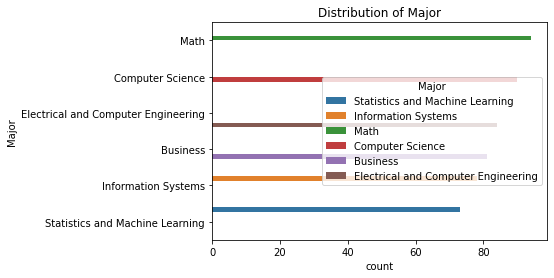

In [10]:

sns.countplot(data = df, y = 'Major', order = df['Major'].value_counts().index, hue = 'Major')
plt.title("Distribution of Major")

<AxesSubplot:xlabel='Age', ylabel='Count'>

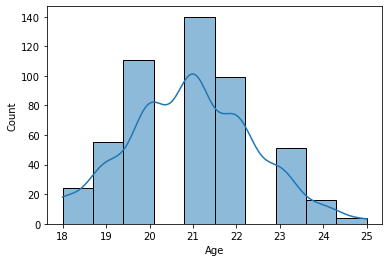

In [11]:
# Age
#df.groupby('Age').size().plot(kind='bar', title='Distribution of Age', ylabel='No. of Students')
sns.histplot(data=df, x="Age", kde=True, bins = 10)

[Text(0.5, 1.0, 'Distribution of GPA')]

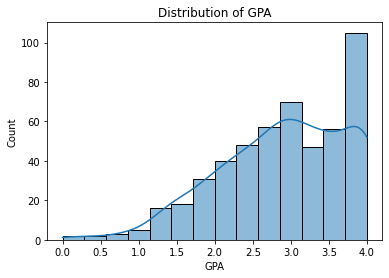

In [12]:
# GPA

sns.histplot(data=df, x="GPA", kde=True).set(title='Distribution of GPA')

Text(0.5, 1.0, 'Distribution of Extra-Curriculars')

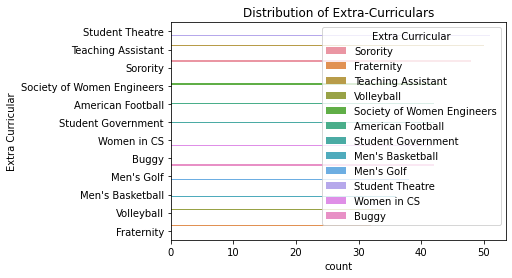

In [13]:
# Extra Curricular
color = ['black','red','green','orange','blue','limegreen','darkgreen','royalblue','navy','red','pink','orange']


sns.countplot(data = df, y = 'Extra Curricular', order = df['Extra Curricular'].value_counts().index, hue='Extra Curricular')
plt.title("Distribution of Extra-Curriculars")

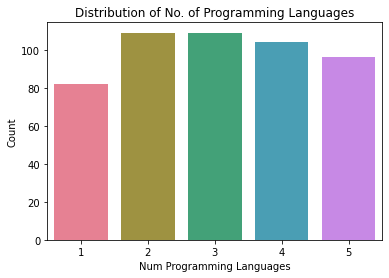

In [14]:
# Programming Languages
custom_palette = sns.color_palette("husl", n_colors=len(df['Num Programming Languages'].unique()))

# Create the count plot
sns.countplot(x='Num Programming Languages', data=df, palette=custom_palette)

# Set labels and title
plt.xlabel("Num Programming Languages")
plt.ylabel("Count")
plt.title("Distribution of No. of Programming Languages")

# Show the plot
plt.show()

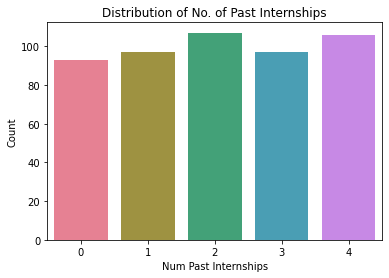

In [15]:
#Past Internships
custom_palette = sns.color_palette("husl", n_colors=len(df['Num Past Internships'].unique()))

# Create the count plot
sns.countplot(x='Num Past Internships', data=df, palette=custom_palette)

# Set labels and title
plt.xlabel("Num Past Internships")
plt.ylabel("Count")
plt.title("Distribution of No. of Past Internships")

# Show the plot
plt.show()

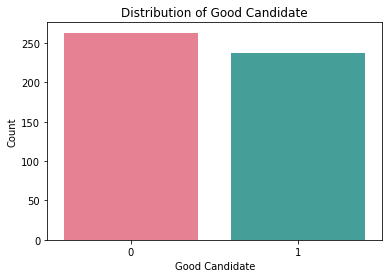

In [16]:
# Good Candidate

custom_palette = sns.color_palette("husl", n_colors=len(df['Good Candidate'].unique()))

# Create the count plot
sns.countplot(x='Good Candidate', data=df, palette=custom_palette)

# Set labels and title
plt.xlabel("Good Candidate")
plt.ylabel("Count")
plt.title("Distribution of Good Candidate")

# Show the plot
plt.show()

## Predicting output of test data using model

In [17]:
#test_df = df.drop(['Good Candidate'], axis=1)
X = df.drop(['Good Candidate'], axis=1)
y = df['Good Candidate']
X.head()

,Student ID,Gender,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships
0,0,F,21,Statistics and Machine Learning,2.83,Sorority,4,1
1,1,M,20,Information Systems,2.89,Fraternity,5,3
2,2,F,20,Math,2.66,Teaching Assistant,3,1
3,3,M,20,Information Systems,2.48,Fraternity,5,0
4,4,F,21,Statistics and Machine Learning,3.30,Sorority,2,1


In [18]:
clf = joblib.load('./model.pkl')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encode',
                                                  OneHotEncoder(), [1, 3])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features=None,
                                        n_estimators=1000))])

### Output of test dataset

In [19]:
feature_cols = ['Student ID', 'Gender', 'Age', 'Major', 'GPA', 'Extra Curricular',
       'Num Programming Languages', 'Num Past Internships']
y_pred = clf.predict(df[feature_cols])
y_pred = pd.Series(y_pred)
y_pred

0      0
1      1
2      0
3      1
4      0
      ..
495    0
496    1
497    0
498    1
499    0
Length: 500, dtype: int64

In [20]:
y_true = df['Good Candidate']
y_true

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    1
497    0
498    1
499    0
Name: Good Candidate, Length: 500, dtype: int64

### Accuracy

In [21]:
print(f"Test accuracy is {(y_true==y_pred).sum()/y.size:.4f}")

Test accuracy is 0.8320


In [22]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y, y_pred)
print("The confusion matrix is")
confusion_matrix

The confusion matrix is


array([[221,  42],
       [ 42, 195]])

### Confusion Matrix and Performance Evaluation

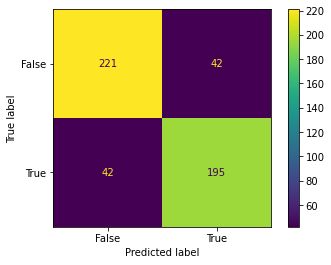

In [23]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Assuming you have already trained your model (replace 'model' with your model)
# Make predictions on the test dataset
y_pred = clf.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision and recall, and F1-score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Generate a classification report (includes precision, recall, and F1-score)
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Create and display a confusion matrix
confusion = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.83
Precision: 0.82
Recall: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       263
           1       0.82      0.82      0.82       237

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500

Confusion Matrix:
[[221  42]
 [ 42 195]]


In [84]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

y_true = df['Good Candidate']  # True labels (actual values)
y_pred = clf.predict(X)  # Predicted labels

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Extract true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Calculate Recall (True Positive Rate)
recall = recall_score(y_true, y_pred)

# Calculate Precision
precision = precision_score(y_true, y_pred)

# Print the results
print("Confusion Matrix:")
print(confusion)
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"Recall (True Positive Rate): {recall:.2f}")
print(f"Precision: {precision:.2f}")


Confusion Matrix:
[[221  42]
 [ 42 195]]
True Positives: 195
True Negatives: 221
False Positives: 42
False Negatives: 42
Recall (True Positive Rate): 0.82
Precision: 0.82


In [85]:
numFields = ['Age', 'GPA', 'Num Programming Languages', 'Num Past Internships', 'Good Candidate']
for field in numFields:
  print(f"-------- {field} --------")
  print(df[field].describe())
  print("median   \t", df[field].median())
  print("mode\n", df[field].mode())

-------- Age --------
count    500.000000
mean      20.944000
std        1.455025
min       18.000000
25%       20.000000
50%       21.000000
75%       22.000000
max       25.000000
Name: Age, dtype: float64
median   	 21.0
mode
 0    21
Name: Age, dtype: int64
-------- GPA --------
count    500.000000
mean       2.905780
std        0.839559
min        0.000000
25%        2.345000
50%        2.990000
75%        3.560000
max        4.000000
Name: GPA, dtype: float64
median   	 2.99
mode
 0    4.0
Name: GPA, dtype: float64
-------- Num Programming Languages --------
count    500.00000
mean       3.04600
std        1.36073
min        1.00000
25%        2.00000
50%        3.00000
75%        4.00000
max        5.00000
Name: Num Programming Languages, dtype: float64
median   	 3.0
mode
 0    2
1    3
Name: Num Programming Languages, dtype: int64
-------- Num Past Internships --------
count    500.000000
mean       2.052000
std        1.407572
min        0.000000
25%        1.000000
50%      

In [86]:
columns = ['Major', 'Age', 'Gender', 'Extra Curricular', 'Num Programming Languages', 'Num Past Internships']
distribution_counts = dict()
for index, row in df.iterrows():
  for i in range(len(columns)):
    col = columns[i]
    if curr_col not in distribution_counts:
      distribution_counts[col] = dict()
    if row[col] not in distribution_counts[col]:
      distribution_counts[col][row[col]] = 0
    distribution_counts[col][row[col]] += 1

import json
print(json.dumps(distribution_counts, sort_keys=True, indent=4))

{
    "Age": {
        "18": 24,
        "19": 55,
        "20": 111,
        "21": 140,
        "22": 99,
        "23": 51,
        "24": 16,
        "25": 4
    },
    "Extra Curricular": {
        "American Football": 42,
        "Buggy": 42,
        "Fraternity": 32,
        "Men's Basketball": 36,
        "Men's Golf": 38,
        "Society of Women Engineers": 43,
        "Sorority": 48,
        "Student Government": 42,
        "Student Theatre": 51,
        "Teaching Assistant": 50,
        "Volleyball": 34,
        "Women in CS": 42
    },
    "Gender": {
        "F": 263,
        "M": 237
    },
    "Major": {
        "Business": 81,
        "Computer Science": 90,
        "Electrical and Computer Engineering": 84,
        "Information Systems": 78,
        "Math": 94,
        "Statistics and Machine Learning": 73
    },
    "Num Past Internships": {
        "0": 93,
        "1": 97,
        "2": 107,
        "3": 97,
        "4": 106
    },
    "Num Programming Languages": {


### Fairness - Group Aware

In [89]:
# Keep track of outputs, predicted vs actual for accuracy metrics to be done later
predicted = []
actual = []

# Iterate over dataset and predict each student
for index, row in df.iterrows():
  fields = ["student_id", "major", "age", "gender", "gpa", "extra_curricular", "num_programming_languages", "num_past_internships"]
  names = ['Student ID', 'Major', 'Age', 'Gender', 'GPA', 'Extra Curricular', 'Num Programming Languages', 'Num Past Internships']

  # Create a student object for predicting
  student = dict()
  for i in range(len(fields)):
    field = fields[i]
    col = names[i]
    student[field] = row[col]

  # Get the outputs, predicted and actual
  predicted.append(predict(student)['good_employee'])
  actual.append(row['Good Candidate'])

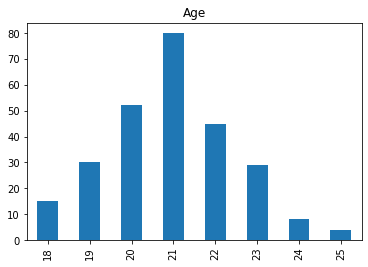

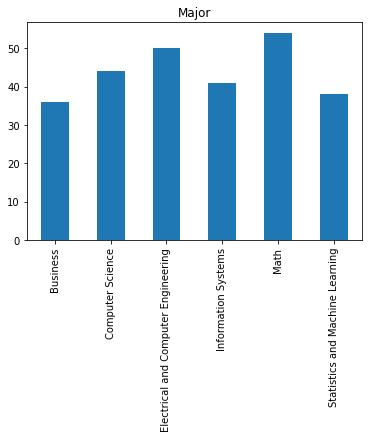

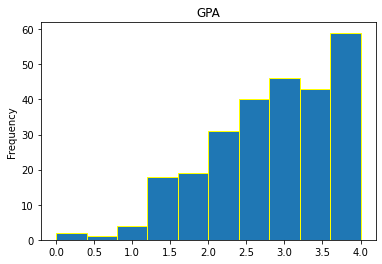

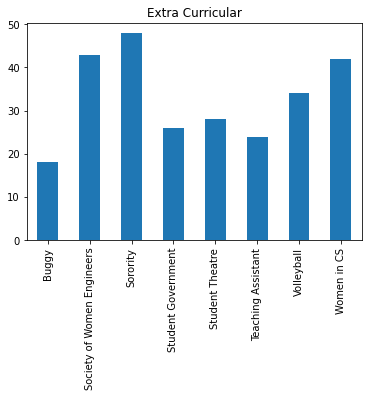

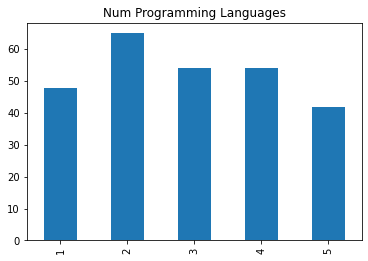

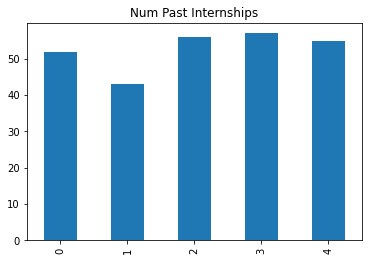

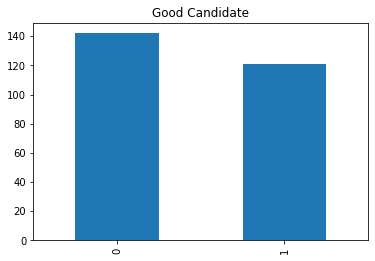

In [90]:
# Information for women
df_women = df[df.Gender != 'M']

# Distribution of all other fields (besides Gender)
fields = ['Age', 'Major', 'GPA', 'Extra Curricular', 'Num Programming Languages', 'Num Past Internships', 'Good Candidate']
for field in fields:
  fig, ax = plt.subplots()
  if field == 'GPA':
    df_women[field].plot(kind='hist', edgecolor='yellow', title=field)
  else:
    df_women[field].value_counts().sort_index().plot(ax=ax, kind='bar', title=field)

In [91]:
# Keep track of outputs, predicted vs actual for accuracy metrics to be done later
predicted_women = []
actual_women = []

for index, row in df_women.iterrows():
  fields = ["student_id", "major", "age", "gender", "gpa", "extra_curricular", "num_programming_languages", "num_past_internships"]
  names = ['Student ID', 'Major', 'Age', 'Gender', 'GPA', 'Extra Curricular', 'Num Programming Languages', 'Num Past Internships']

  student = dict()
  for i in range(len(fields)):
    field = fields[i]
    col = col_names[i]
    student[field] = row[col]

  predicted_women.append(predict(student)['good_employee'])
  actual_women.append(row['Good Candidate'])
     

In [92]:
print("Accuracy score for women is ", accuracy_score(actual_women, predicted_women))
print("Confusion matrix for women: \n", confusion_matrix(actual_women, predicted_women))

Accuracy score for women is  0.870722433460076
Confusion matrix for women: 
 [[140   2]
 [ 32  89]]


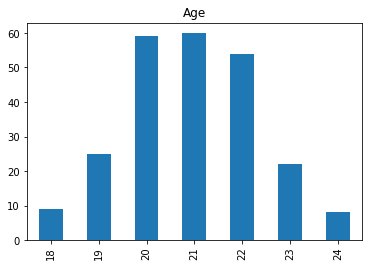

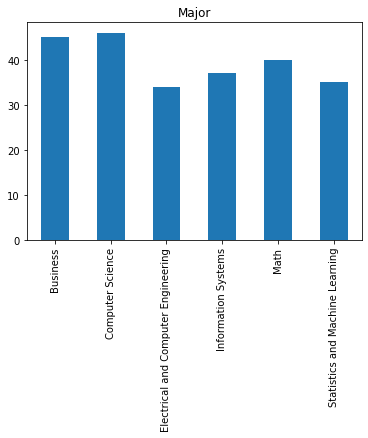

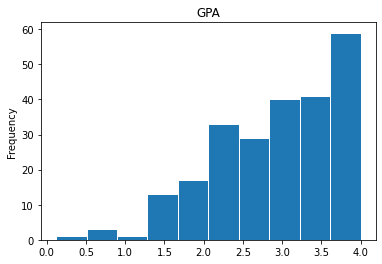

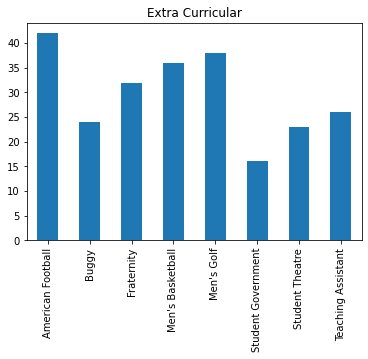

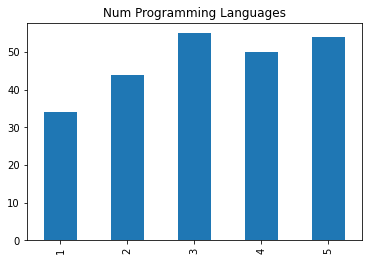

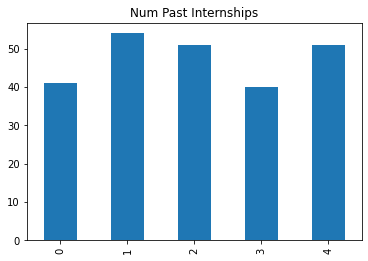

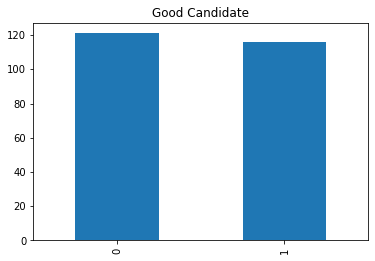

In [93]:
# Men
df_men = df[df.Gender != 'F']

fields = ['Age', 'Major', 'GPA', 'Extra Curricular', 'Num Programming Languages', 'Num Past Internships', 'Good Candidate']
for field in fields:
  fig, ax = plt.subplots()
  if field == 'GPA':
    df_men[field].plot(kind='hist', edgecolor='white', title=field)
  else:
    df_men[field].value_counts().sort_index().plot(ax=ax, kind='bar', title=field)

In [94]:
predicted_men = []
actual_men = []

for index, row in df_men.iterrows():
  fields = ["student_id", "major", "age", "gender", "gpa", "extra_curricular", "num_programming_languages", "num_past_internships"]
  names = ['Student ID', 'Major', 'Age', 'Gender', 'GPA', 'Extra Curricular', 'Num Programming Languages', 'Num Past Internships']

  # Construct a student object to be predicted
  student = dict()
  for i in range(len(fields)):
    field = fields[i]
    col = names[i]
    student[field] = row[col]

  # Get the outputs, predicted and actual
  predicted_men.append(predict(student)['good_employee'])
  actual_men.append(row['Good Candidate'])
     

In [95]:
print("Accuracy score for men is ", accuracy_score(actual_men, predicted_men))
print("Confusion matrix: \n", confusion_matrix(actual_men, predicted_men))

Accuracy score for men is  0.7890295358649789
Confusion matrix: 
 [[ 81  40]
 [ 10 106]]


In [97]:
# True positive rates for men and women
from sklearn.metrics import confusion_matrix, recall_score

# Men
conf_matrix_men = confusion_matrix(actual_men, predicted_men)
TP_men = conf_matrix_men[1, 1]
FN_men = conf_matrix_men[1, 0]
TPR_men = TP_men / (TP_men + FN_men)

#######

# Women
conf_matrix_women = confusion_matrix(actual_women, predicted_women)
TP_women = conf_matrix_women[1, 1]
FN_women = conf_matrix_women[1, 0]
TPR_women = TP_women / (TP_women + FN_women)

# Print the TPR for men
print(f"True Positive Rate (Recall) for men: {TPR_men:.2f}")
# Print the TPR for women
print(f"True Positive Rate (Recall) for women: {TPR_women:.2f}")

True Positive Rate (Recall) for men: 0.91
True Positive Rate (Recall) for women: 0.74


### Fairness - Group Unaware

In [148]:
predicted_men = []
actual_men = []

for index, row in df_men.iterrows():
    fields = ["student_id", "major", "age", "gender", "gpa", "extra_curricular", "num_programming_languages", "num_past_internships"]
    names = ['Student ID', 'Major', 'Age', 'Gender', 'GPA', 'Extra Curricular', 'Num Programming Languages', 'Num Past Internships']
    student = {fields[i]: row[names[i]] for i in range(len(fields))}
    predicted_men.append(predict(student)['good_employee'])
    actual_men.append(row['Good Candidate'])

In [149]:
predicted_women = []
actual_women = []

for index, row in df_women.iterrows():
    fields = ["student_id", "major", "age", "gender", "gpa", "extra_curricular", "num_programming_languages", "num_past_internships"]
    names = ['Student ID', 'Major', 'Age', 'Gender', 'GPA', 'Extra Curricular', 'Num Programming Languages', 'Num Past Internships']
    student = {fields[i]: row[names[i]] for i in range(len(fields))}
    predicted_women.append(predict(student)['good_employee'])
    actual_women.append(row['Good Candidate'])


### Fairness - Demographic Parity

In [150]:
import numpy

numpy_predicted_men = numpy.array(predicted_men)
unique, counts = numpy.unique(numpy_predicted_men, return_counts=True)
d = dict(zip(unique, counts))
positive_men = d[1]
total_men = d[0] + d[1]
prediction_men = positive_men/total_men
# number of predicted good candidates for men
print(f"Good candidates for men (predicted):  {prediction_men}")


numpy_actual_men = numpy.array(actual_men)
unique, counts = numpy.unique(numpy_actual_men, return_counts=True)
d = dict(zip(unique, counts))
positive_men1 = d[1]
total_men1 = d[0] + d[1]
actual_men = positive_men1/total_men1
# number of actual good candidates for men
print(f"Good candidates for men (actual):  {actual_men}")


numpy_predicted_women = numpy.array(predicted_women)
unique, counts = numpy.unique(numpy_predicted_women, return_counts=True)
d = dict(zip(unique, counts))
positive_women = d[1]
total_women = d[0] + d[1]
prediction_women = positive_women/total_women
# number of predicted good candidates for women
print(f"Good candidates for women (predicted):  {prediction_women}")


numpy_actual_women = numpy.array(actual_women)
unique, counts = numpy.unique(numpy_actual_women, return_counts=True)
d = dict(zip(unique, counts))
positive_women1 = d[1]
total_women1 = d[0] + d[1]
actual_women = positive_women1/total_women1
# number of actual good candidates for women
print(f"Good candidates for women (actual):  {actual_women}")

Good candidates for men (predicted):  0.6160337552742616
Good candidates for men (actual):  0.48945147679324896
Good candidates for women (predicted):  0.34600760456273766
Good candidates for women (actual):  0.4600760456273764


### Fairness Evaluation

In [174]:
# Disparate Impact (DI)
DI_predicted = prediction_women / prediction_men
DI_actual = actual_women / actual_men

print(DI_predicted)
print(DI_actual)

# Statistical Parity Difference (SPD)
SPD_predicted = actual_women - prediction_men
SPD_actual = actual_women - actual_men



0.5616698786395125
0.9399829552904155


In [177]:
# Disparate Impact (DI)
DI_predicted = prediction_women / prediction_men
DI_actual = actual_women / actual_men

# Actual TPR values for men and women
TPR_actual_men = TPR_men  # Replace with the actual True Positive Rate for men
TPR_actual_women = TPR_women  # Replace with the actual True Positive Rate for women


# Statistical Parity Difference (SPD)
SPD_predicted = TPR_actual_women - TPR_actual_men
SPD_actual = TPR_actual_women - TPR_actual_men

# Equal Opportunity Difference (EOD)
EOD_predicted = TPR_actual_women - TPR_actual_men

# Equalized Odds Difference (EOD Positive and Negative)
# Calculate the true negative rate for men and women
TNR_actual_men = 1.0 - TPR_actual_men  # Assuming binary classification
TNR_actual_women = 1.0 - TPR_actual_women

EOD_positive_predicted = TPR_actual_women - TPR_actual_men
EOD_negative_predicted = TNR_actual_women - TNR_actual_men

EOD_positive_actual = TPR_actual_women - TPR_actual_men
EOD_negative_actual = TNR_actual_women - TNR_actual_men

print("Disparate Impact (DI) Predicted:", DI_predicted)
print("Disparate Impact (DI) Actual:", DI_actual)

print("Statistical Parity Difference (SPD) Predicted:", SPD_predicted)
print("Statistical Parity Difference (SPD) Actual:", SPD_actual)

print("Equal Opportunity Difference (EOD) Predicted:", EOD_predicted)
print("Equal Opportunity Difference (EOD) Actual:", EOD_actual)

print("Equalized Odds Difference (EOD Positive) Predicted:", EOD_positive_predicted)
print("Equalized Odds Difference (EOD Negative) Predicted:", EOD_negative_predicted)

print("Equalized Odds Difference (EOD Positive) Actual:", EOD_positive_actual)
print("Equalized Odds Difference (EOD Negative) Actual:", EOD_negative_actual)


Disparate Impact (DI) Predicted: 0.5616698786395125
Disparate Impact (DI) Actual: 0.9399829552904155
Statistical Parity Difference (SPD) Predicted: -0.1782559133656313
Statistical Parity Difference (SPD) Actual: -0.1782559133656313
Equal Opportunity Difference (EOD) Predicted: -0.1782559133656313
Equal Opportunity Difference (EOD) Actual: 0.04999999999999993
Equalized Odds Difference (EOD Positive) Predicted: -0.1782559133656313
Equalized Odds Difference (EOD Negative) Predicted: 0.1782559133656313
Equalized Odds Difference (EOD Positive) Actual: -0.1782559133656313
Equalized Odds Difference (EOD Negative) Actual: 0.1782559133656313
